In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('learningSet.csv')

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_16457/3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
print(data.shape)
data.head(10)

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [4]:
Y = data[['TARGET_B', 'TARGET_D']]
Y

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [5]:
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [6]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

# CATEGORICALS  

In [7]:
categorical.isna().sum()/len(categorical)*100

OSOURCE     0.000000
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
PVASTATE    0.000000
              ...   
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.138347
Length: 74, dtype: float64

In [8]:
nulls_percent_cat = pd.DataFrame(categorical.isna().sum()/len(categorical)*100).reset_index()

In [9]:
nulls_percent_cat.columns = ['column_name', 'nulls_percentage']
nulls_percent_cat

,column_name,nulls_percentage
0,OSOURCE,0.000000
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.000000
...,...,...
69,RFA_2A,0.000000
70,MDMAUD_R,0.000000
71,MDMAUD_F,0.000000
72,MDMAUD_A,0.000000


In [10]:
nulls_percent_cat[nulls_percent_cat['nulls_percentage']!=0]

,column_name,nulls_percentage
73,GEOCODE2,0.138347


In [11]:
columns_above_threshold = nulls_percent_cat[nulls_percent_cat['nulls_percentage']>50]
columns_above_threshold['column_name'] 

Series([], Name: column_name, dtype: object)

In [12]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

[]


In [13]:
categorical = categorical.drop(drop_columns_list, axis=1)


In [14]:
categorical

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,XXXX,C2,27,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,,L1G,F1G,F1G,,F1G,P1G,P1G,,,,,,,,,,,,,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,XXXX,C1,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1F,,,,,P1F,P1F,,,,,,,,,,,,,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,XXXX,C3,30,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,X,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,,F1D,,,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,XXXX,C1,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [15]:
categorical = categorical.drop('OSOURCE',axis=1)

In [16]:
categorical=categorical.drop('ZIP',axis=1)

In [17]:
categorical

,STATE,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,CA,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,NC,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,CA,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,FL,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,AK,,,0,,,,,XXXX,C2,27,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,,L1G,F1G,F1G,,F1G,P1G,P1G,,,,,,,,,,,,,,,,,L,G,X,X,X,C
95408,TX,,,0,,,,,XXXX,C1,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1F,,,,,P1F,P1F,,,,,,,,,,,,,,,,,L,F,X,X,X,A
95409,MI,,,0,,X,,,XXXX,C3,30,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,X,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,,F1D,,,P1D,P1D,,,L,E,X,X,X,B
95410,CA,,,0,X,,,,XXXX,C1,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [18]:
categorical['STATE'].value_counts().reset_index()



,index,STATE
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
5,NC,4160
6,WA,3577
7,GA,3403
8,IN,2980
9,WI,2795


In [19]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
#other_states
def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [20]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [21]:
categorical['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [22]:
categorical['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [23]:
categorical['GENDER']= categorical['GENDER'].replace(['U', 'J', 'C', 'A'], 'other')

In [24]:
categorical['GENDER'].value_counts()

F        51277
M        39094
          2957
other     2084
Name: GENDER, dtype: int64

In [25]:
categorical['GENDER'] = categorical['GENDER'].replace(' ','F')

In [26]:
categorical['GENDER'].value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [27]:
categorical['DOMAIN'].value_counts(dropna=False)

R2    13623
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
       2316
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [28]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [29]:
categorical['DOMAIN'] = categorical['DOMAIN'].replace(' ','R2')

In [30]:
categorical['DOMAIN'].value_counts()

R2    15939
T2    12369
S1    11503
S2     8530
C2     8264
C1     6145
C3     5280
T1     4982
R3     4809
U1     4510
U2     3254
U3     2598
T3     2176
S3     1891
U4     1804
R1     1358
Name: DOMAIN, dtype: int64

In [31]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))


In [32]:
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [33]:
categorical

,STATE,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C,T,2
1,CA,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A,S,1
2,NC,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C,R,2
3,CA,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C,R,2
4,FL,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,,,0,,,,,XXXX,C2,27,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,,L1G,F1G,F1G,,F1G,P1G,P1G,,,,,,,,,,,,,,,,,L,G,X,X,X,C,C,2
95408,TX,,,0,,,,,XXXX,C1,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1F,,,,,P1F,P1F,,,,,,,,,,,,,,,,,L,F,X,X,X,A,C,1
95409,MI,,,0,,X,,,XXXX,C3,30,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,X,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,,F1D,,,P1D,P1D,,,L,E,X,X,X,B,C,3
95410,CA,,,0,X,,,,XXXX,C1,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,X,X,X,A,C,1


In [34]:
categorical = categorical.drop(columns=['DOMAIN'])

In [35]:
categorical = categorical.drop(columns=['MAILCODE','NOEXCH','MDMAUD','MDMAUD_R', 'MDMAUD_F','MDMAUD_A'])

In [36]:
categorical

,STATE,PVASTATE,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,,,,,,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,C,T,2
1,CA,,,,,,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,A,S,1
2,NC,,,,,,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,C,R,2
3,CA,,,,,,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,C,R,2
4,FL,,X,X,,,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,,,,,,27,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,,L1G,F1G,F1G,,F1G,P1G,P1G,,,,,,,,,,,,,,,,,L,G,C,C,2
95408,TX,,,,,,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1F,,,,,P1F,P1F,,,,,,,,,,,,,,,,,L,F,A,C,1
95409,MI,,,X,,,30,,,,,,,M,,,,,,,,,,,,,,,,,,,,,,,,,X,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,,F1D,,,P1D,P1D,,,L,E,B,C,3
95410,CA,,X,,,,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,A,C,1


In [37]:
categorical['CLUSTER'].value_counts()

40    3979
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
      2316
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, dtype: int64

In [38]:
categorical['CLUSTER'].sort_values().unique()

array([' ', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '50', '51', '52', '53', '6', '7', '8', '9'],
      dtype=object)

In [39]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna(categorical['CLUSTER'].mode()[0])

In [40]:
categorical['CLUSTER'] = categorical['CLUSTER'].replace(' ',(categorical['CLUSTER'].mode()[0]))

In [41]:
categorical['CLUSTER'].value_counts()

40    6295
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, dtype: int64

In [42]:
categoricals = pd.DataFrame(categorical['CLUSTER'].value_counts()).reset_index()



In [43]:
categoricals

,index,CLUSTER
0,40,6295
1,35,3624
2,36,3617
3,27,3553
4,24,3539
5,49,3315
6,12,3000
7,18,2897
8,13,2706
9,30,2607


In [44]:
categoricals.columns = ['cluster_num', 'count']
other_clusters = list(categoricals[categoricals['count']<2500]['cluster_num'])
#other_states
def clean_cluster(x):
    if x in other_clusters:
        return 'other'
    else:
        return x
    
categorical['CLUSTER'] = list(map(clean_cluster, categorical['CLUSTER']))

In [45]:
categorical['CLUSTER'].value_counts()

other    55143
40        6295
35        3624
36        3617
27        3553
24        3539
49        3315
12        3000
18        2897
13        2706
30        2607
39        2601
45        2515
Name: CLUSTER, dtype: int64

In [46]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H    52354
     22228
U    20830
Name: HOMEOWNR, dtype: int64

In [47]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].replace(' ','U')

In [48]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

In [49]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].replace(' ','A')

In [50]:
categorical['DATASRCE'] = categorical['DATASRCE'].replace(' ','3')

In [51]:
categorical['DATASRCE'].value_counts(dropna=False)

3    64829
2    23455
1     7128
Name: DATASRCE, dtype: int64

In [52]:
categorical

,STATE,PVASTATE,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,,,,,,36,,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,C,T,2
1,CA,,,,,,other,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,A,S,1
2,NC,,,,,,other,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,C,R,2
3,CA,,,,,,other,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,C,R,2
4,FL,,X,X,,,other,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,,,,,,27,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1G,F1G,F1G,,F1G,P1G,P1G,,,,,,,,,,,,,,,,,L,G,C,C,2
95408,TX,,,,,,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L1F,,,,,P1F,P1F,,,,,,,,,,,,,,,,,L,F,A,C,1
95409,MI,,,X,,,30,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L3E,S4E,S4E,S3E,S3E,,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,,F1D,,,P1D,P1D,,,L,E,B,C,3
95410,CA,,X,,,,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,A,C,1


In [53]:
drop_list = []

for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)       

In [54]:
drop_list

['RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24',
 'RFA_2R',
 'RFA_2A']

In [55]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24']

In [56]:
categorical = categorical.drop(columns=drop_list)


In [57]:
categorical.isna().sum()

STATE         0
PVASTATE      0
RECINHSE      0
RECP3         0
RECPGVG       0
RECSWEEP      0
CLUSTER       0
AGEFLAG       0
HOMEOWNR      0
CHILD03       0
CHILD07       0
CHILD12       0
CHILD18       0
GENDER        0
DATASRCE      0
SOLP3         0
SOLIH         0
MAJOR         0
GEOCODE       0
COLLECT1      0
VETERANS      0
BIBLE         0
CATLG         0
HOMEE         0
PETS          0
CDPLAY        0
STEREO        0
PCOWNERS      0
PHOTO         0
CRAFTS        0
FISHER        0
GARDENIN      0
BOATS         0
WALKER        0
KIDSTUFF      0
CARDS         0
PLATES        0
LIFESRC       0
PEPSTRFL      0
RFA_2R        0
RFA_2A        0
GEOCODE2    132
DOMAIN_A      0
DOMAIN_B      0
dtype: int64

In [58]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34671
B      28505
D      16580
C      15524
NaN      132
Name: GEOCODE2, dtype: int64

In [59]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [60]:
categorical.isna().sum()

STATE       0
PVASTATE    0
RECINHSE    0
RECP3       0
RECPGVG     0
RECSWEEP    0
CLUSTER     0
AGEFLAG     0
HOMEOWNR    0
CHILD03     0
CHILD07     0
CHILD12     0
CHILD18     0
GENDER      0
DATASRCE    0
SOLP3       0
SOLIH       0
MAJOR       0
GEOCODE     0
COLLECT1    0
VETERANS    0
BIBLE       0
CATLG       0
HOMEE       0
PETS        0
CDPLAY      0
STEREO      0
PCOWNERS    0
PHOTO       0
CRAFTS      0
FISHER      0
GARDENIN    0
BOATS       0
WALKER      0
KIDSTUFF    0
CARDS       0
PLATES      0
LIFESRC     0
PEPSTRFL    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

# NUMERICALS

In [61]:
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

In [62]:
num_null = pd.DataFrame(numerical.isna().sum()).reset_index()
num_null.columns = ['column_name', 'nulls']
num_null[num_null['nulls']>0].head(60)

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
6,WEALTH1,44732
8,MBCRAFT,52854
9,MBGARDEN,52854
10,MBBOOKS,52854
11,MBCOLECT,52914
12,MAGFAML,52854
13,MAGFEM,52854


In [63]:
num_drop_list = []

for col_name in numerical.columns:
    if "ADATE" in col_name:
        num_drop_list.append(col_name)     

In [64]:
num_drop_list

['ADATE_2',
 'ADATE_3',
 'ADATE_4',
 'ADATE_5',
 'ADATE_6',
 'ADATE_7',
 'ADATE_8',
 'ADATE_9',
 'ADATE_10',
 'ADATE_11',
 'ADATE_12',
 'ADATE_13',
 'ADATE_14',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'MAXADATE']

In [65]:
numerical = numerical.drop(columns=num_drop_list)


In [66]:
num_drop_list2 = []

for col_name in numerical.columns:
    if "RDATE" in col_name:
        num_drop_list2.append(col_name)     

In [67]:
numerical = numerical.drop(columns=num_drop_list2)

In [68]:
num_null = pd.DataFrame(numerical.isna().sum()).reset_index()
num_null.columns = ['column_name', 'nulls']
num_null[num_null['nulls']>0].head(60)

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
6,WEALTH1,44732
8,MBCRAFT,52854
9,MBGARDEN,52854
10,MBBOOKS,52854
11,MBCOLECT,52914
12,MAGFAML,52854
13,MAGFEM,52854


In [69]:
numerical['AGE'] = numerical["AGE"].fillna(50.0)

In [70]:
numerical['INCOME'] = numerical['INCOME'].fillna(5.0)

In [71]:
numerical['INCOME'].value_counts(dropna=False)

5.0    36737
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [72]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [73]:
numerical['CLUSTER2'].value_counts(dropna=False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

In [74]:
numerical['WEALTH2'] = numerical['WEALTH2'].fillna(5.0)

In [75]:
numerical['WEALTH2'].value_counts(dropna=False)

5.0    49174
9.0     6523
8.0     5975
7.0     5684
6.0     5497
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [76]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(5.0)

In [77]:
numerical['INCOME'] = numerical['INCOME'].astype('object')
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
numerical['CLUSTER2'] = numerical['CLUSTER2'].astype('object')
numerical['WEALTH1'] = numerical['WEALTH1'].astype('object')

In [78]:
#categorical_append = numerical.select_dtypes(object)
#categorical_append

In [79]:
categorical = pd.DataFrame(categorical)

In [80]:
#categorical = pd.concat([categorical,categorical_append],axis=1)

In [81]:
categorical

,STATE,PVASTATE,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,,,,,,36,,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L,E,C,T,2
1,CA,,,,,,other,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L,G,A,S,1
2,NC,,,,,,other,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L,E,C,R,2
3,CA,,,,,,other,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L,E,C,R,2
4,FL,,X,X,,,other,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,,,,,,27,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L,G,C,C,2
95408,TX,,,,,,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L,F,A,C,1
95409,MI,,,X,,,30,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L,E,B,C,3
95410,CA,,X,,,,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L,F,A,C,1


In [82]:
num_null3 = pd.DataFrame(numerical.isna().sum()).reset_index()
num_null3.columns = ['column_name', 'nulls']
num_null3[num_null3['nulls']>0].head(60)

,column_name,nulls
4,NUMCHLD,83026
8,MBCRAFT,52854
9,MBGARDEN,52854
10,MBBOOKS,52854
11,MBCOLECT,52914
12,MAGFAML,52854
13,MAGFEM,52854
14,MAGMALE,52854
15,PUBGARDN,52854
16,PUBCULIN,52854


In [83]:
numerical['NUMCHLD'].value_counts(dropna=False)

NaN    83026
1.0     7792
2.0     3110
3.0     1101
4.0      316
5.0       59
6.0        7
7.0        1
Name: NUMCHLD, dtype: int64

In [84]:
numerical['NUMCHLD'] = numerical['NUMCHLD'].fillna(0)

In [85]:
numerical['WEALTH1'].value_counts(dropna=False)

5.0    50012
9.0     7585
8.0     6793
7.0     6198
6.0     5825
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [86]:
num_drop_list4 = []

for col_name in numerical.columns:
    if "MB" in col_name:
        num_drop_list4.append(col_name)   

In [87]:
for col_name in numerical.columns:
    if "PUB" in col_name:
        num_drop_list4.append(col_name)   

In [88]:
for col_name in numerical.columns:
    if "MAG" in col_name:
        num_drop_list4.append(col_name)   

In [89]:
num_drop_list4

['MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE']

In [90]:
for col_name in numerical.columns:
    if "RAMNT" in col_name:
        num_drop_list4.append(col_name)  

In [91]:
numerical = numerical.drop(columns=num_drop_list4)

In [92]:
num_null4 = pd.DataFrame(numerical.isna().sum()).reset_index()
num_null4.columns = ['column_name', 'nulls']
num_null4[num_null4['nulls']>0].head(60)

,column_name,nulls
136,MSA,132
137,ADI,132
138,DMA,132
311,NEXTDATE,9973
312,TIMELAG,9973


In [93]:
numerical['MSA'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [94]:
numerical['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [95]:
numerical['MSA'] = numerical['MSA'].fillna(0.0)
numerical['ADI'] = numerical['ADI'].fillna(13.0)
numerical['DMA'] = numerical['ADI'].fillna(803.0)

In [96]:
numerical['DMA'].value_counts(dropna=False)

13.0     7428
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: DMA, Length: 204, dtype: int64

In [97]:
num_null5 = pd.DataFrame(numerical.isna().sum()).reset_index()
num_null5.columns = ['column_name', 'nulls']
num_null5[num_null5['nulls']>0].head(60)

,column_name,nulls
311,NEXTDATE,9973
312,TIMELAG,9973


In [98]:
numerical['NEXTDATE'].value_counts(dropna=False)

NaN       9973
9504.0    2253
9412.0    1970
8703.0    1959
9512.0    1870
          ... 
8107.0       1
7408.0       1
8207.0       1
8104.0       1
8412.0       1
Name: NEXTDATE, Length: 189, dtype: int64

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_16457/2905960302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['NEXTDATE'])


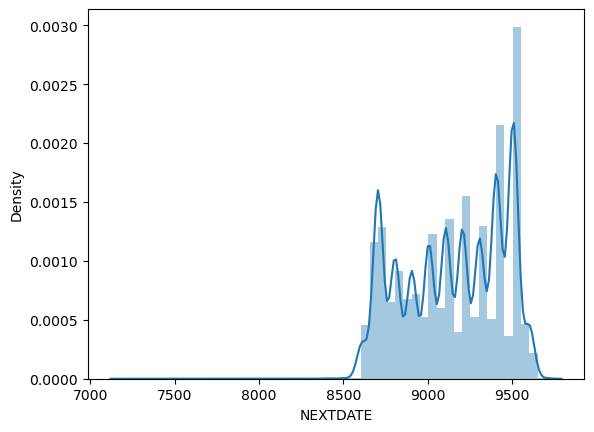

In [99]:
sns.distplot(numerical['NEXTDATE'])
plt.show()

In [100]:
numerical['TIMELAG'].value_counts(dropna=False)

NaN       9973
5.0       8584
4.0       8490
3.0       8485
6.0       6648
          ... 
89.0         1
1044.0       1
53.0         1
442.0        1
1088.0       1
Name: TIMELAG, Length: 69, dtype: int64

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_16457/4111071299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical['TIMELAG'])


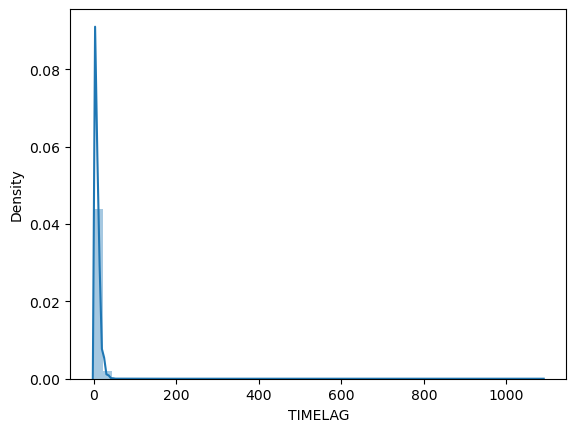

In [101]:
sns.distplot(numerical['TIMELAG'])
plt.show()

In [102]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna('-1.0')
numerical['NEXTDATE'] = numerical['NEXTDATE'].fillna('-1.0')

In [103]:
num_null6 = pd.DataFrame(numerical.isna().sum()).reset_index()
num_null6.columns = ['column_name', 'nulls']
num_null6[num_null6['nulls']>0].head(60)

,column_name,nulls


In [104]:
categorical 

,STATE,PVASTATE,RECINHSE,RECP3,RECPGVG,RECSWEEP,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,,,,,,36,,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L,E,C,T,2
1,CA,,,,,,other,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L,G,A,S,1
2,NC,,,,,,other,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L,E,C,R,2
3,CA,,,,,,other,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L,E,C,R,2
4,FL,,X,X,,,other,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,,,,,,27,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L,G,C,C,2
95408,TX,,,,,,24,E,H,,,,M,M,3,,,,,,,,,,,,,,,,,,,,,,,,,L,F,A,C,1
95409,MI,,,X,,,30,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L,E,B,C,3
95410,CA,,X,,,,24,E,H,,,,,F,2,,12,,4,,,,,,,,,,,,,,,,,,,1,X,L,F,A,C,1


In [105]:
categorical.isna().sum()

STATE       0
PVASTATE    0
RECINHSE    0
RECP3       0
RECPGVG     0
RECSWEEP    0
CLUSTER     0
AGEFLAG     0
HOMEOWNR    0
CHILD03     0
CHILD07     0
CHILD12     0
CHILD18     0
GENDER      0
DATASRCE    0
SOLP3       0
SOLIH       0
MAJOR       0
GEOCODE     0
COLLECT1    0
VETERANS    0
BIBLE       0
CATLG       0
HOMEE       0
PETS        0
CDPLAY      0
STEREO      0
PCOWNERS    0
PHOTO       0
CRAFTS      0
FISHER      0
GARDENIN    0
BOATS       0
WALKER      0
KIDSTUFF    0
CARDS       0
PLATES      0
LIFESRC     0
PEPSTRFL    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

In [106]:
categorical = categorical.drop(columns=['PVASTATE','RECINHSE','RECP3','RECPGVG','RECSWEEP','AGEFLAG','CHILD03','CHILD07','CHILD12','CHILD18','SOLP3','MAJOR','COLLECT1','BIBLE','CATLG','HOMEE','PETS','SOLIH','VETERANS','CDPLAY','STEREO','PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES','LIFESRC','PEPSTRFL','GEOCODE'])


In [107]:
numerical.isna().sum().head(100)

ODATEDW    0
TCODE      0
DOB        0
AGE        0
NUMCHLD    0
          ..
HHD1       0
HHD2       0
HHD3       0
HHD4       0
HHD5       0
Length: 100, dtype: int64

In [108]:
numerical.to_csv('numericals_lab.csv')

In [109]:
categorical.to_csv('categoricals_lab.csv')

In [110]:
Y

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [111]:
Y.to_csv('Y_targets.csv')

In [112]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,36,U,F,3,L,E,C,T,2
1,CA,other,H,M,3,L,G,A,S,1
2,NC,other,U,M,3,L,E,C,R,2
3,CA,other,U,F,3,L,E,C,R,2
4,FL,other,H,F,3,L,F,A,S,2
...,...,...,...,...,...,...,...,...,...,...
95407,other,27,U,M,3,L,G,C,C,2
95408,TX,24,H,M,3,L,F,A,C,1
95409,MI,30,U,M,3,L,E,B,C,3
95410,CA,24,H,F,2,L,F,A,C,1


In [113]:
numerical.dtypes.tail(50)

POBC1         int64
POBC2         int64
LSC1          int64
LSC2          int64
LSC3          int64
LSC4          int64
VOC1          int64
VOC2          int64
VOC3          int64
HC1           int64
HC2           int64
HC3           int64
HC4           int64
HC5           int64
HC6           int64
HC7           int64
HC8           int64
HC9           int64
HC10          int64
HC11          int64
HC12          int64
HC13          int64
HC14          int64
HC15          int64
HC16          int64
HC17          int64
HC18          int64
HC19          int64
HC20          int64
HC21          int64
MHUC1         int64
MHUC2         int64
AC1           int64
AC2           int64
CARDPROM      int64
NUMPROM       int64
CARDPM12      int64
NUMPRM12      int64
NGIFTALL      int64
CARDGIFT      int64
LASTGIFT    float64
LASTDATE      int64
FISTDATE      int64
NEXTDATE     object
TIMELAG      object
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2     object


In [114]:
numerical["TIMELAG"] = pd.to_numeric(numerical["TIMELAG"])
numerical["NEXTDATE"] = pd.to_numeric(numerical["NEXTDATE"])

In [115]:
X = pd.concat([categorical, numerical], axis=1)

In [116]:
X

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,IL,36,U,F,3,L,E,C,T,2,8901,0,3712,60.0,0.0,5.0,5.0,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,177.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,31,14,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,CA,other,H,M,3,L,G,A,S,1,9401,1,5202,46.0,1.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,13.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,3,1,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,NC,other,U,M,3,L,E,C,R,2,9001,1,0,50.0,0.0,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,

In [117]:
y = pd.DataFrame(Y['TARGET_B'])

In [118]:
y

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [120]:
train_num = X_train.select_dtypes(np.number)
test_num = X_test.select_dtypes(np.number)
train_cat = X_train.select_dtypes(object)
test_cat = X_test.select_dtypes(object)

In [121]:
train_num

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
16443,9501,0,0,50.0,0.0,0,0,25,43,6,8,2,1,1449,386,438,99,0,0,51,49,87,1,0,8,14,1,1,2,2,0,1,0,11,0,0,2,31,39,41,31,40,43,28,36,41,22,14,24,27,20,8,5,2,14,13,36,21,16,11,1,7,6,27,67,43,16,8,60,11,3,27,270,329,96,96,0,4,4,1,0,0,0,2330,2379,11,11,82,18,97,3,0,50,88,70,40,91,9,9,3,6,11,9,5,20,60,6,0,1,0,86,97,99,99,99,7,0,73,60,62,18,5,3,0,0,15,2,1,0,99,99,99,99,5945.0,13.0,13.0,564,593,576,598,17474,8,5,10,17,36,20,4,0,1,4,4,12,17,36,20,4,0,1,14,2,55,6,39,61,12,81,12,1,1,0,0,1,2,4,0,16,24,31,11,75,79,85,72,81,70,77,71,66,0,3,12,20,5,17,22,2,1,2,1,11,2,1,4,2,0,7,20,1,2,8,12,11,4,3,2,11,5,9,3,8,2,1,7,77,2,2,138,3,10,20,37,15,10,5,8,33,2,24,14,0,0,0,13,25,1,43,22,6,12,1,4,1,13,0,1,3,2,2,0,0,0,0,0,0,10,53,87,6,2,5,99,87,38,8,23,0,1,3,41,99,0,0,0,98,0,2,0,0,0,99,0,99,99,99,11,2,4,2,10,29,6,15,8,4,6.0,9602,9501,9505.0,4.0,5.500000,158551,0,4
26821,9601,0,0,50.0,0.0,0,0,27,36,28,2,3,0,5898,1651,2081,0,0,99,48,52,62,37,0,0,1,0,0,0,0,0,0,0,0,0,0,0,31,38,42,33,42,46,27,37,40,23,15,25,22,16,11,8,4,15,15,31,22,17,19,7,17,19,29,52,30,11,4,59,11,7,23,210,280,59,59,0,1,0,0,1,1,0,466,499,2,1,84,16,95,5,15,45,79,63,34,90,10,11,2,9,11,15,2,13,40,9,9,24,4,0,0,2,12,44,0,2,33,48,51,15,5,1,0,39,10,0,0,5,0,2,14,45,0.0,281.0,281.0,250,294,292,327,10552,25,25,17,18,12,2,0,0,0,17,24,19,22,14,3,0,0,0,25,6,21,9,33,67,4,78,18,0,0,0,0,0,4,0,1,43,23,26,3,76,71,82,61,77,58,69,69,62,99,5,5,4,1,8,12,0,1,6,2,20,23,9,7,2,0,11,44,2,2,3,17,3,5,2,0,5,2,3,0,2,3,0,4,88,3,0,120,18,29,28,17,5,2,1,2,24,2,19,5,0,0,0,13,27,0,36,11,28,18,0,3,0,3,0,0,7,0,0,0,0,0,1,0,0,0,84,95,4,0,1,92,70,31,10,18,3,16,30,62,80,20,0,0,5,7,46,23,1,18,14,84,10,98,96,9,3,6,5,5,14,4,11,1,1,15.0,9601,9601,-1.0,-1.0,15.000000,16114,1,1
57160,8701,2,1603,82.0,0.0,0,0,0,0,0,0,0,0,17724,4742,8534,99,0,0,48,52,92,1,1,6,3,0,1,1,2,0,0,0,1,0,0,1,39,43,46,42,48,50,15,49,35,16,8,21,23,13,11,13,11,21,20,30,17,11,30,13,28,35,40,24,12,4,1,54,13,8,25,136,206,67,66,3,32,29,25,1,0,1,2099,2519,5,5,64,36,97,3,7,19,56,47,15,71,29,4,1,3,19,30,9,12,56,24,0,1,0,53,75,94,99,99,26,6,50,61,57,12,3,13,19,0,9,6,20,0,49,77,91,95,7600.0,105.0,105.0,397,527,501,615,26460,13,13,17,19,19,8,4,2,4,5,9,13,20,27,11,5,3,7,28,3,64,5,47,53,16,68,11,12,12,0,0,0,3,5,1,4,20,24,3,70,67,77,57,75,56,61,44,81,99,4,21,22,4,15,16,0,1,6,1,5,2,4,2,2,0,5,12,6,3,5

In [122]:
train_cat

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,INCOME,WEALTH1,WEALTH2,CLUSTER2
16443,CA,12,U,M,3,L,E,A,S,1,5.0,5.0,5.0,5.0
26821,NC,other,H,M,3,L,F,C,R,3,6.0,3.0,5.0,61.0
57160,WA,40,U,F,2,L,F,A,R,2,1.0,5.0,9.0,8.0
81135,CA,other,H,F,1,L,G,A,U,1,4.0,6.0,5.0,7.0
70733,IL,other,H,F,3,L,D,A,U,2,1.0,3.0,3.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,CA,other,H,F,1,L,G,A,C,1,1.0,7.0,5.0,12.0
54886,IN,other,U,M,1,L,F,B,S,3,2.0,2.0,2.0,23.0
76820,NC,12,H,F,2,L,F,B,S,1,5.0,5.0,9.0,20.0
860,other,45,U,M,2,L,F,D,R,2,2.0,5.0,5.0,59.0


In [123]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(train_num)
X_train_normalized = MinMaxtransformer.transform(train_num)
print(type(X_train_normalized))
X_train_normalized = pd.DataFrame(X_train_normalized,columns=train_num.columns)
display(X_train_normalized.head())
print(type(X_train_normalized))

<class 'numpy.ndarray'>


,ODATEDW,TCODE,DOB,AGE,NUMCHLD,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,0.856631,0.000000,0.000000,0.505155,0.0,0.000000,0.0,0.252525,0.434343,0.060606,0.080808,0.020202,0.016667,0.014681,0.016242,0.012372,1.0,0.0,0.0,0.515152,0.494949,0.878788,0.010101,0.000000,0.080808,0.141414,0.045455,0.013889,0.020202,0.029851,0.000000,0.021277,0.0,0.113402,0.00,0.0,0.023256,0.3875,0.475610,0.500000,0.397436,0.512821,0.551282,0.373333,0.363636,0.414141,0.222222,0.144330,0.242424,0.272727,0.202020,0.080808,0.050505,0.025641,0.141414,0.131313,0.363636,0.212121,0.161616,0.111111,0.010101,0.070707,0.060606,0.272727,0.676768,0.434343,0.161616,0.080808,0.606061,0.111111,0.044776,0.272727,0.415385,0.470000,0.969697,0.969697,0.000000,0.040404,0.040404,0.010101,0.000000,0.000000,0.000000,0.388333,0.396500,0.846154,0.846154,0.828283,0.181818,0.979798,0.030303,0.000000,0.505051,0.888889,0.707071,0.404040,0.919192,0.090909,0.090909,0.06,0.060606,0.111111,0.090909,0.050505,0.266667,0.606061,0.060606,0.000000,0.010101,0.000000,0.868687,0.979798,1.000000,1.000000,1.000000,0.070707,0.000000,0.737374,0.705882,0.688889,0.295082,0.125,0.030303,0.000000,0.000000,0.151515,0.020202,0.010101,0.000000,1.000000,1.000000,1.000000,1.000000,0.635150,0.019969,0.019969,0.376000,0.395333,0.384000,0.398667,0.100124,0.080808,0.050505,0.101010,0.171717,0.363636,0.363636,0.08,0.000000,0.010101,0.040404,0.040404,0.121212,0.171717,0.363636,0.202020,0.08,0.000000,0.010101,0.141414,0.020202,0.555556,0.060606,0.393939,0.616162,0.121212,0.818182,0.121212,0.010101,0.010101,0.000000,0.0,0.04,0.020202,0.040404,0.000000,0.161616,0.266667,0.407895,0.129412,0.757576,0.797980,0.858586,0.727273,0.818182,0.707071,0.777778,0.717172,0.666667,0.0,0.030303,0.121212,0.202020,0.050505,0.171717,0.222222,0.046512,0.018182,0.020202,0.010101,0.111111,0.020202,0.010101,0.040404,0.020202,0.0,0.070707,0.202020,0.010101,0.031250,0.080808,0.121212,0.111111,0.040404,0.030303,0.032787,0.111111,0.050505,0.090909,0.030303,0.080808,0.020202,0.010101,0.070707,0.777778,0.020202,0.020202,0.811765,0.030303,0.101010,0.202020,0.373737,0.405405,0.101010,0.050505,0.082474,0.333333,0.066667,0.333333,0.141414,0.000000,0.000000,0.0,0.131313,0.252525,0.033333,0.434343,0.222222,0.060606,0.121212,0.012048,0.040404,0.033333,0.141304,0.000000,0.071429,0.030303,0.044444,0.029412,0.000000,0.0,0.000000,0.000

<class 'pandas.core.frame.DataFrame'>


In [124]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(test_num)
X_test_normalized = MinMaxtransformer.transform(test_num)
print(type(X_test_normalized))
X_test_normalized = pd.DataFrame(X_test_normalized,columns=test_num.columns)
display(X_test_normalized.head())
print(type(X_test_normalized))

<class 'numpy.ndarray'>


,ODATEDW,TCODE,DOB,AGE,NUMCHLD,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,1.000000,0.000026,0.597425,0.402062,0.000000,0.045643,0.000000,0.282828,0.333333,0.191919,0.030303,0.191781,0.034483,0.012594,0.016311,0.012767,0.929293,0.0,0.080808,0.515152,0.494949,0.979798,0.000000,0.010204,0.021505,0.040404,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.021053,0.000000,0.000000,0.023256,0.416667,0.488095,0.500000,0.404762,0.511905,0.535714,0.394366,0.313131,0.434343,0.262626,0.101010,0.191919,0.323232,0.191919,0.111111,0.098361,0.030303,0.151515,0.101010,0.4375,0.242424,0.161616,0.131313,0.030303,0.121212,0.141414,0.373737,0.494949,0.272727,0.101010,0.020202,0.646465,0.121212,0.041096,0.212121,0.301538,0.391429,0.898990,0.858586,0.030303,0.101010,0.070707,0.060606,0.0,0.0,0.0,0.167833,0.187500,0.307692,0.307692,0.858586,0.151515,0.979798,0.030303,0.141414,0.414141,0.787879,0.666667,0.333333,0.878788,0.131313,0.080808,0.04,0.060606,0.131313,0.121212,0.072165,0.309859,0.656566,0.101010,0.000000,0.000000,0.000000,0.050505,0.161616,0.515152,0.848485,0.979798,0.000000,0.010101,0.828283,0.870588,0.808989,0.245902,0.100,0.090909,0.010101,0.0,0.060606,0.035714,0.060606,0.0,0.242424,0.313131,0.858586,0.949495,0.115385,0.689922,0.689922,0.282000,0.324000,0.354667,0.386667,0.117805,0.060606,0.146341,0.171717,0.222222,0.242424,0.070707,0.194444,0.065574,0.010101,0.050505,0.080808,0.161616,0.252525,0.232323,0.090909,0.184211,0.060606,0.010101,0.151515,0.0250,0.686869,0.065217,0.555556,0.454545,0.111111,0.838384,0.159420,0.000000,0.000000,0.0,0.0,0.00,0.020202,0.067797,0.0,0.010101,0.166667,0.213333,0.000000,0.535354,0.808081,0.858586,0.757576,0.858586,0.696970,0.777778,0.626263,1.000000,1.0,0.000000,0.243590,0.285714,0.040404,0.200000,0.181818,0.000000,0.026316,0.080808,0.027027,0.080808,0.030303,0.090909,0.000000,0.027027,0.017857,0.101010,0.111111,0.030303,0.10,0.065574,0.111111,0.101010,0.125,0.030303,0.014925,0.050505,0.142857,0.132353,0.204545,0.030303,0.233333,0.046875,0.208955,0.575758,0.090909,0.000000,0.905882,0.030303,0.016129,0.151515,0.453125,0.171429,0.343434,0.160000,0.063291,0.303030,0.142857,0.416667,0.141414,0.0,0.000000,0.0,0.253968,0.282828,0.066667,0.333333,0.222222,0.191919,0.121212,0.0,0.187500,0.032258,0.096386,0.000000,0.000000,0.061224,0.018182,0.0,0.000000,0.0,0.033333,0.02,0.15,0.0,0.033333,0.43

<class 'pandas.core.frame.DataFrame'>


In [125]:
ordinal_cat_train = pd.DataFrame(train_cat[['INCOME','WEALTH1','WEALTH2']])


In [126]:
train_cat

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,INCOME,WEALTH1,WEALTH2,CLUSTER2
16443,CA,12,U,M,3,L,E,A,S,1,5.0,5.0,5.0,5.0
26821,NC,other,H,M,3,L,F,C,R,3,6.0,3.0,5.0,61.0
57160,WA,40,U,F,2,L,F,A,R,2,1.0,5.0,9.0,8.0
81135,CA,other,H,F,1,L,G,A,U,1,4.0,6.0,5.0,7.0
70733,IL,other,H,F,3,L,D,A,U,2,1.0,3.0,3.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,CA,other,H,F,1,L,G,A,C,1,1.0,7.0,5.0,12.0
54886,IN,other,U,M,1,L,F,B,S,3,2.0,2.0,2.0,23.0
76820,NC,12,H,F,2,L,F,B,S,1,5.0,5.0,9.0,20.0
860,other,45,U,M,2,L,F,D,R,2,2.0,5.0,5.0,59.0


In [127]:
ordinal_cat_train

,INCOME,WEALTH1,WEALTH2
16443,5.0,5.0,5.0
26821,6.0,3.0,5.0
57160,1.0,5.0,9.0
81135,4.0,6.0,5.0
70733,1.0,3.0,3.0
...,...,...,...
6265,1.0,7.0,5.0
54886,2.0,2.0,2.0
76820,5.0,5.0,9.0
860,2.0,5.0,5.0


In [128]:
ordinal_cat_test = pd.DataFrame(test_cat[['INCOME','WEALTH1','WEALTH2']])

In [129]:
train_cat = train_cat.drop(columns=['INCOME','WEALTH1','WEALTH2'])

In [130]:
test_cat = test_cat.drop(columns=['INCOME','WEALTH1','WEALTH2'])

In [131]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(train_cat)
categoricals_train_hotencoded = encoder.transform(train_cat).toarray()
categoricals_test_hotencoded = encoder.transform(test_cat).toarray()
col = encoder.get_feature_names_out()
categoricals_train_hotencoded = pd.DataFrame(categoricals_train_hotencoded,columns=col)
categoricals_test_hotencoded = pd.DataFrame(categoricals_test_hotencoded,columns=col)

In [132]:
ordinal_cat_test.dtypes


INCOME     object
WEALTH1    object
WEALTH2    object
dtype: object

In [133]:
ordinal_cat_test[["INCOME", "WEALTH1","WEALTH2"]] = ordinal_cat_test[["INCOME", "WEALTH1","WEALTH2"]].apply(pd.to_numeric)

In [134]:
ordinal_cat_train[["INCOME", "WEALTH1","WEALTH2"]] = ordinal_cat_train[["INCOME", "WEALTH1","WEALTH2"]].apply(pd.to_numeric)

In [188]:
X_train_normalized

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F
0,0.856631,0.000000,0.000000,0.505155,0.0,0.000000,0.000000,0.252525,0.434343,0.060606,0.080808,0.020202,0.016667,0.014681,0.016242,0.012372,1.0,0.000000,0.000000,0.515152,0.494949,0.878788,0.010101,0.000000,0.080808,0.141414,0.045455,0.013889,0.020202,0.029851,0.000000,0.021277,0.0,0.113402,0.00,0.0,0.023256,0.3875,0.475610,0.500000,0.397436,0.512821,0.551282,0.373333,0.363636,0.414141,0.222222,0.144330,0.242424,0.272727,0.202020,0.080808,0.050505,0.025641,0.141414,0.131313,0.363636,0.212121,0.161616,0.111111,0.010101,0.070707,0.060606,0.272727,0.676768,0.434343,0.161616,0.080808,0.606061,0.111111,0.044776,0.272727,0.415385,0.470000,0.969697,0.969697,0.000000,0.040404,0.040404,0.010101,0.000000,0.000000,0.000000,0.388333,0.396500,0.846154,0.846154,0.828283,0.181818,0.979798,0.030303,0.000000,0.505051,0.888889,0.707071,0.404040,0.919192,0.090909,0.090909,0.06,0.060606,0.111111,0.090909,0.050505,0.266667,0.606061,0.060606,0.000000,0.010101,0.000000,0.868687,0.979798,1.000000,1.000000,1.000000,0.070707,0.000000,0.737374,0.705882,0.688889,0.295082,0.125,0.030303,0.000000,0.000000,0.151515,0.020202,0.010101,0.000000,1.000000,1.000000,1.000000,1.000000,0.635150,0.019969,0.019969,0.376000,0.395333,0.384000,0.398667,0.100124,0.080808,0.050505,0.101010,0.171717,0.363636,0.363636,0.08,0.000000,0.010101,0.040404,0.040404,0.121212,0.171717,0.363636,0.202020,0.08,0.000000,0.010101,0.141414,0.020202,0.555556,0.060606,0.393939,0.616162,0.121212,0.818182,0.121212,0.010101,0.010101,0.000000,0.0,0.04,0.020202,0.040404,0.000000,0.161616,0.266667,0.407895,0.129412,0.757576,0.797980,0.858586,0.727273,0.818182,0.707071,0.777778,0.717172,0.666667,0.0,0.030303,0.121212,0.202020,0.050505,0.171717,0.222222,0.046512,0.018182,0.020202,0.010101,0.111111,0.020202,0.010101,0.040404,0.020202,0.000000,0.070707,0.202020,0.010101,0.031250,0.080808,0.121212,0.111111,0.040404,0.030303,0.032787,0.111111,0.050505,0.090909,0.030303,0.080808,0.020202,0.010101,0.070707,0.777778,0.020202,0.020202,0.811765,0.030303,0.101010,0.202020,0.373737,0.405405,0.101010,0.050505,0.082474,0.333333,0.066667,0.333333,0.141414,0.000000,0.000000,0.0,0.131313,0.252525,0.033333,0.434343,0.222222,0.060606,0.121212,0.012048,0.040404,0.033333,0.141304,0.000000,0.071429,0.030303,0.044444,0.029412,0.00000

In [189]:
categoricals_train_hotencoded

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_13,CLUSTER_18,CLUSTER_24,CLUSTER_27,CLUSTER_30,CLUSTER_35,CLUSTER_36,CLUSTER_39,CLUSTER_40,CLUSTER_45,CLUSTER_49,CLUSTER_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,CLUSTER2_2.0,CLUSTER2_3.0,CLUSTER2_4.0,CLUSTER2_5.0,CLUSTER2_6.0,CLUSTER2_7.0,CLUSTER2_8.0,CLUSTER2_9.0,CLUSTER2_10.0,CLUSTER2_11.0,CLUSTER2_12.0,CLUSTER2_13.0,CLUSTER2_14.0,CLUSTER2_15.0,CLUSTER2_16.0,CLUSTER2_17.0,CLUSTER2_18.0,CLUSTER2_19.0,CLUSTER2_20.0,CLUSTER2_21.0,CLUSTER2_22.0,CLUSTER2_23.0,CLUSTER2_24.0,CLUSTER2_25.0,CLUSTER2_26.0,CLUSTER2_27.0,CLUSTER2_28.0,CLUSTER2_29.0,CLUSTER2_30.0,CLUSTER2_31.0,CLUSTER2_32.0,CLUSTER2_33.0,CLUSTER2_34.0,CLUSTER2_35.0,CLUSTER2_36.0,CLUSTER2_37.0,CLUSTER2_38.0,CLUSTER2_39.0,CLUSTER2_40.0,CLUSTER2_41.0,CLUSTER2_42.0,CLUSTER2_43.0,CLUSTER2_44.0,CLUSTER2_45.0,CLUSTER2_46.0,CLUSTER2_47.0,CLUSTER2_48.0,CLUSTER2_49.0,CLUSTER2_50.0,CLUSTER2_51.0,CLUSTER2_52.0,CLUSTER2_53.0,CLUSTER2_54.0,CLUSTER2_55.0,CLUSTER2_56.0,CLUSTER2_57.0,CLUSTER2_58.0,CLUSTER2_59.0,CLUSTER2_60.0,CLUSTER2_61.0,CLUSTER2_62.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [193]:
ordinal_cat_train = ordinal_cat_train.reset_index()

In [196]:
ordinal_cat_test = ordinal_cat_test.reset_index()

In [197]:
X_train = pd.concat([X_train_normalized, categoricals_train_hotencoded,ordinal_cat_train], axis=1)

In [198]:
X_train

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_13,CLUSTER_18,CLUSTER_24,CLUSTER_27,CLUSTER_30,CLUSTER_35,CLUSTER_36,CLUSTER_39,CLUSTER_40,CLUSTER_45,CLUSTER_49,CLUSTER_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,CLUSTER2_2.0,CLUSTER2_3.0,CLUSTER2_4.0,CLUSTER2_5.0,CLUSTER2_6.0,CLUSTER2_7.0,CLUSTER2_8.0,CLUSTER2_9.0,CLUSTER2_10.0,CLUSTER2_11.0,CLUSTER2_12.0,CLUSTER2_13.0,CLUSTER2_14.0,CLUSTER2_15.0,CLUSTER2_16.0,CLUSTER2_17.0,CLUSTER2_18.0,CLUSTER2_19.0,CLUSTER2_20.0,CLUSTER2_21.0,CLUSTER2_22.0,CLUSTER2_23.0,CLUSTER2_24.0,CLUSTER2_25.0,CLUSTER2_26.0,CLUSTER2_27.0,CLUSTER2_28.0,CLUSTER2_29.0,CLUSTER2_30.0,CLUSTER2_31.0,CLUSTER2_32.0,CLUSTER2_33.0,CLUSTER2_34.0,CLUSTER2_35.0,CLUSTER2_36.0,CLUSTER2_37.0,CLUSTER2_38.0,CLUSTER2_39.0,CLUSTER2_40.0,CLUSTER2_41.0,CLUSTER2_42.0,CLUSTER2_43.0,CLUSTER2_44.0,CLUSTER2_45.0,CLUSTER2_46.0,CLUSTER2_47.0,CLUSTER2_48.0,CLUSTER2_49.0,CLUSTER2_50.0,CLUSTER2_51.0,CLUSTER2_52.0,CLUSTER2_53.0,CLUSTER2_54.0,CLUSTER2_55.0,CLUSTER2_56.0,CLUSTER2_57.0,CLUSTER2_58.0,CLUSTER2_59.0,CLUSTER2_60.0,CLUSTER2_61.0,CLUSTER2_62.0,index,INCOME,WEALTH1,WEALTH2
0,0.856631,0.000000,0.000000,0.505155,0.0,0.000000,0.000000,0.252525,0.434343,0.060606,0.080808,0.020202,0.016667,0.014681,0.016242,0.012372,1.0,0.000000,0.000000,0.515152,0.494949,0.878788,0.010101,0.000000,0.080808,0.141414,0.045455,0.013889,0.020202,0.029851,0.000000,0.021277,0.0,0.113402,0.00,0.0,0.023256,0.3875,0.475610,0.500000,0.397436,0.512821,0.551282,0.373333,0.363636,0.414141,0.222222,0.144330,0.242424,0.272727,0.202020,0.080808,0.050505,0.025641,0.141414,0.131313,0.363636,0.212121,0.161616,0.111111,0.010101,0.070707,0.060606,0.272727,0.676768,0.434343,0.161616,0.080808,0.606061,0.111111,0.044776,0.272727,0.415385,0.470000,0.969697,0.969697,0.000000,0.040404,0.040404,0.010101,0.000000,0.000000,0.000000,0.388333,0.396500,0.846154,0.846154,0.828283,0.181818,0.979798,0.030303,0.000000,0.505051,0.888889,0.707071,0.404040,0.919192,0.090909,0.090909,0.06,0.060606,0.111111,0.090909,0.050505,0.266667,0.606061,0.060606,0.000000,0.010101,0.000000,0.868687,0.979

In [201]:
X_test = pd.concat([X_test_normalized, categoricals_test_hotencoded,ordinal_cat_test], axis=1)

In [202]:
X_train = pd.DataFrame(X_train)
X_train

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_13,CLUSTER_18,CLUSTER_24,CLUSTER_27,CLUSTER_30,CLUSTER_35,CLUSTER_36,CLUSTER_39,CLUSTER_40,CLUSTER_45,CLUSTER_49,CLUSTER_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,CLUSTER2_2.0,CLUSTER2_3.0,CLUSTER2_4.0,CLUSTER2_5.0,CLUSTER2_6.0,CLUSTER2_7.0,CLUSTER2_8.0,CLUSTER2_9.0,CLUSTER2_10.0,CLUSTER2_11.0,CLUSTER2_12.0,CLUSTER2_13.0,CLUSTER2_14.0,CLUSTER2_15.0,CLUSTER2_16.0,CLUSTER2_17.0,CLUSTER2_18.0,CLUSTER2_19.0,CLUSTER2_20.0,CLUSTER2_21.0,CLUSTER2_22.0,CLUSTER2_23.0,CLUSTER2_24.0,CLUSTER2_25.0,CLUSTER2_26.0,CLUSTER2_27.0,CLUSTER2_28.0,CLUSTER2_29.0,CLUSTER2_30.0,CLUSTER2_31.0,CLUSTER2_32.0,CLUSTER2_33.0,CLUSTER2_34.0,CLUSTER2_35.0,CLUSTER2_36.0,CLUSTER2_37.0,CLUSTER2_38.0,CLUSTER2_39.0,CLUSTER2_40.0,CLUSTER2_41.0,CLUSTER2_42.0,CLUSTER2_43.0,CLUSTER2_44.0,CLUSTER2_45.0,CLUSTER2_46.0,CLUSTER2_47.0,CLUSTER2_48.0,CLUSTER2_49.0,CLUSTER2_50.0,CLUSTER2_51.0,CLUSTER2_52.0,CLUSTER2_53.0,CLUSTER2_54.0,CLUSTER2_55.0,CLUSTER2_56.0,CLUSTER2_57.0,CLUSTER2_58.0,CLUSTER2_59.0,CLUSTER2_60.0,CLUSTER2_61.0,CLUSTER2_62.0,index,INCOME,WEALTH1,WEALTH2
0,0.856631,0.000000,0.000000,0.505155,0.0,0.000000,0.000000,0.252525,0.434343,0.060606,0.080808,0.020202,0.016667,0.014681,0.016242,0.012372,1.0,0.000000,0.000000,0.515152,0.494949,0.878788,0.010101,0.000000,0.080808,0.141414,0.045455,0.013889,0.020202,0.029851,0.000000,0.021277,0.0,0.113402,0.00,0.0,0.023256,0.3875,0.475610,0.500000,0.397436,0.512821,0.551282,0.373333,0.363636,0.414141,0.222222,0.144330,0.242424,0.272727,0.202020,0.080808,0.050505,0.025641,0.141414,0.131313,0.363636,0.212121,0.161616,0.111111,0.010101,0.070707,0.060606,0.272727,0.676768,0.434343,0.161616,0.080808,0.606061,0.111111,0.044776,0.272727,0.415385,0.470000,0.969697,0.969697,0.000000,0.040404,0.040404,0.010101,0.000000,0.000000,0.000000,0.388333,0.396500,0.846154,0.846154,0.828283,0.181818,0.979798,0.030303,0.000000,0.505051,0.888889,0.707071,0.404040,0.919192,0.090909,0.090909,0.06,0.060606,0.111111,0.090909,0.050505,0.266667,0.606061,0.060606,0.000000,0.010101,0.000000,0.868687,0.979

In [203]:
X_test = pd.DataFrame(X_test)
X_test

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_13,CLUSTER_18,CLUSTER_24,CLUSTER_27,CLUSTER_30,CLUSTER_35,CLUSTER_36,CLUSTER_39,CLUSTER_40,CLUSTER_45,CLUSTER_49,CLUSTER_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,CLUSTER2_2.0,CLUSTER2_3.0,CLUSTER2_4.0,CLUSTER2_5.0,CLUSTER2_6.0,CLUSTER2_7.0,CLUSTER2_8.0,CLUSTER2_9.0,CLUSTER2_10.0,CLUSTER2_11.0,CLUSTER2_12.0,CLUSTER2_13.0,CLUSTER2_14.0,CLUSTER2_15.0,CLUSTER2_16.0,CLUSTER2_17.0,CLUSTER2_18.0,CLUSTER2_19.0,CLUSTER2_20.0,CLUSTER2_21.0,CLUSTER2_22.0,CLUSTER2_23.0,CLUSTER2_24.0,CLUSTER2_25.0,CLUSTER2_26.0,CLUSTER2_27.0,CLUSTER2_28.0,CLUSTER2_29.0,CLUSTER2_30.0,CLUSTER2_31.0,CLUSTER2_32.0,CLUSTER2_33.0,CLUSTER2_34.0,CLUSTER2_35.0,CLUSTER2_36.0,CLUSTER2_37.0,CLUSTER2_38.0,CLUSTER2_39.0,CLUSTER2_40.0,CLUSTER2_41.0,CLUSTER2_42.0,CLUSTER2_43.0,CLUSTER2_44.0,CLUSTER2_45.0,CLUSTER2_46.0,CLUSTER2_47.0,CLUSTER2_48.0,CLUSTER2_49.0,CLUSTER2_50.0,CLUSTER2_51.0,CLUSTER2_52.0,CLUSTER2_53.0,CLUSTER2_54.0,CLUSTER2_55.0,CLUSTER2_56.0,CLUSTER2_57.0,CLUSTER2_58.0,CLUSTER2_59.0,CLUSTER2_60.0,CLUSTER2_61.0,CLUSTER2_62.0,index,INCOME,WEALTH1,WEALTH2
0,1.000000,0.000026,0.597425,0.402062,0.000000,0.045643,0.000000,0.282828,0.333333,0.191919,0.030303,0.191781,0.034483,0.012594,0.016311,0.012767,0.929293,0.000000,0.080808,0.515152,0.494949,0.979798,0.000000,0.010204,0.021505,0.040404,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.021053,0.000000,0.000000,0.023256,0.416667,0.488095,0.500000,0.404762,0.511905,0.535714,0.394366,0.313131,0.434343,0.262626,0.101010,0.191919,0.323232,0.191919,0.111111,0.098361,0.030303,0.151515,0.101010,0.4375,0.242424,0.161616,0.131313,0.030303,0.121212,0.141414,0.373737,0.494949,0.272727,0.101010,0.020202,0.646465,0.121212,0.041096,0.212121,0.301538,0.391429,0.898990,0.858586,0.030303,0.101010,0.070707,0.060606,0.0,0.0,0.0,0.167833,0.187500,0.307692,0.307692,0.858586,0.151515,0.979798,0.030303,0.141414,0.414141,0.787879,0.666667,0.333333,0.878788,0.131313,0.080808,0.04,0.060606,0.131313,0.121212,0.072165,0.309859,0.656566,0.101010,0.000000,0.000000,0.000000,0.050505,0.1616

In [204]:
y_test

,TARGET_B
84155,0
75272,0
39719,0
44288,0
35420,0
...,...
24355,0
93485,0
94415,0
35767,0


In [206]:
y.value_counts()

TARGET_B
0           90569
1            4843
dtype: int64

In [207]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor()
from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier()
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()

classification = LogisticRegression (random_state = 42).fit(X_train,y_train)

/Users/rozay/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [208]:
classification.score(X_train,y_train)

0.9489372405986668

In [209]:
classification.score(X_test,y_test)

0.9501530205844129

In [210]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [211]:
y_train_sm.value_counts()

TARGET_B
0           67905
1           67905
dtype: int64

In [212]:
model_pipeline = [model4,model5]
model_names = ['LogisticRegression','DecisionTreeClassifier']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_sm, y_train_sm, cv=5))
    scores[model_name] = mean_score
print(scores)

/Users/rozay/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rozay/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rozay/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rozay/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

{'LogisticRegression': 0.552455636551064, 'DecisionTreeClassifier': 0.9364847949340991}


In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20, 
                             min_samples_leaf =20,
                             max_samples=0.8, 
                             random_state=42)
clf.fit(X_train_sm, y_train_sm)
print(clf.score(X_train_sm, y_train_sm))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/rozay/anaconda3/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

In [214]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

In [215]:
sel = sel.fit(X_train)
temp_var = sel.transform(X_train)
temp_var = pd.DataFrame(X_train)
print(temp_var.shape)

(71559, 420)


In [216]:
temp_var

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,NGIFTALL,CARDGIFT,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_13,CLUSTER_18,CLUSTER_24,CLUSTER_27,CLUSTER_30,CLUSTER_35,CLUSTER_36,CLUSTER_39,CLUSTER_40,CLUSTER_45,CLUSTER_49,CLUSTER_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,CLUSTER2_2.0,CLUSTER2_3.0,CLUSTER2_4.0,CLUSTER2_5.0,CLUSTER2_6.0,CLUSTER2_7.0,CLUSTER2_8.0,CLUSTER2_9.0,CLUSTER2_10.0,CLUSTER2_11.0,CLUSTER2_12.0,CLUSTER2_13.0,CLUSTER2_14.0,CLUSTER2_15.0,CLUSTER2_16.0,CLUSTER2_17.0,CLUSTER2_18.0,CLUSTER2_19.0,CLUSTER2_20.0,CLUSTER2_21.0,CLUSTER2_22.0,CLUSTER2_23.0,CLUSTER2_24.0,CLUSTER2_25.0,CLUSTER2_26.0,CLUSTER2_27.0,CLUSTER2_28.0,CLUSTER2_29.0,CLUSTER2_30.0,CLUSTER2_31.0,CLUSTER2_32.0,CLUSTER2_33.0,CLUSTER2_34.0,CLUSTER2_35.0,CLUSTER2_36.0,CLUSTER2_37.0,CLUSTER2_38.0,CLUSTER2_39.0,CLUSTER2_40.0,CLUSTER2_41.0,CLUSTER2_42.0,CLUSTER2_43.0,CLUSTER2_44.0,CLUSTER2_45.0,CLUSTER2_46.0,CLUSTER2_47.0,CLUSTER2_48.0,CLUSTER2_49.0,CLUSTER2_50.0,CLUSTER2_51.0,CLUSTER2_52.0,CLUSTER2_53.0,CLUSTER2_54.0,CLUSTER2_55.0,CLUSTER2_56.0,CLUSTER2_57.0,CLUSTER2_58.0,CLUSTER2_59.0,CLUSTER2_60.0,CLUSTER2_61.0,CLUSTER2_62.0,index,INCOME,WEALTH1,WEALTH2
0,0.856631,0.000000,0.000000,0.505155,0.0,0.000000,0.000000,0.252525,0.434343,0.060606,0.080808,0.020202,0.016667,0.014681,0.016242,0.012372,1.0,0.000000,0.000000,0.515152,0.494949,0.878788,0.010101,0.000000,0.080808,0.141414,0.045455,0.013889,0.020202,0.029851,0.000000,0.021277,0.0,0.113402,0.00,0.0,0.023256,0.3875,0.475610,0.500000,0.397436,0.512821,0.551282,0.373333,0.363636,0.414141,0.222222,0.144330,0.242424,0.272727,0.202020,0.080808,0.050505,0.025641,0.141414,0.131313,0.363636,0.212121,0.161616,0.111111,0.010101,0.070707,0.060606,0.272727,0.676768,0.434343,0.161616,0.080808,0.606061,0.111111,0.044776,0.272727,0.415385,0.470000,0.969697,0.969697,0.000000,0.040404,0.040404,0.010101,0.000000,0.000000,0.000000,0.388333,0.396500,0.846154,0.846154,0.828283,0.181818,0.979798,0.030303,0.000000,0.505051,0.888889,0.707071,0.404040,0.919192,0.090909,0.090909,0.06,0.060606,0.111111,0.090909,0.050505,0.266667,0.606061,0.060606,0.000000,0.010101,0.000000,0.868687,0.979

In [217]:
sel.variances_ > var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

420

In [218]:
len(list(zip(X_train.columns,var_list)))

420

In [219]:
drop_list_var = [col[0] for col in zip(X_train.columns,var_list) if col[1] == False]
len(drop_list_var)

281

In [221]:
drop_list_var

['TCODE',
 'NUMCHLD',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'POP901',
 'POP902',
 'POP903',
 'POP90C4',
 'POP90C5',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW3',
 'DW7',
 'DW8',
 'DW9',
 'HU3',
 'HU4',
 'HHD1',
 'HHD4',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD10',
 'HHD11',
 'HHD12',
 'ETHC1',
 'ETHC3',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'HUR1',
 'RHP1',
 'RHP2',
 'RHP3',
 'RHP4',
 'HUPA1',
 'HUPA4',
 'HUPA5',
 'HUPA7',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 

In [222]:
X_train = X_train.drop(drop_list_var,axis=1)

In [237]:
X_train = X_train.drop(['index'],axis=1)

In [238]:
X_test = X_test.drop(['index'],axis=1)

In [239]:
X_train.shape

(71559, 138)

In [240]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [241]:
K_best = SelectKBest(chi2, k=25).fit_transform(X_train, y_train)

In [242]:
selected = pd.DataFrame(K_best)

In [243]:
K_best.shape

(71559, 25)

In [244]:
model = SelectKBest(chi2, k=25).fit(X_train, y_train)

In [245]:
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column']= X_train.columns
df.sort_values(by=['score'],ascending = False).head(25)

,score,column
79,156.736549,RFA_2F
108,72.696200,RFA_2A_E
110,70.262333,RFA_2A_G
109,34.411325,RFA_2A_F
75,30.544887,LASTDATE
27,18.598802,HVP1
28,17.684614,HVP2
29,16.236213,HVP3
32,15.425003,HVP6
137,13.901562,WEALTH2


In [246]:
cols = df.sort_values(by=['score'],ascending = False).head(25)['column']
col_list = list(cols)

In [247]:
col_list

['RFA_2F',
 'RFA_2A_E',
 'RFA_2A_G',
 'RFA_2A_F',
 'LASTDATE',
 'HVP1',
 'HVP2',
 'HVP3',
 'HVP6',
 'WEALTH2',
 'INCOME',
 'DOMAIN_B_3',
 'HVP4',
 'ETH2',
 'CLUSTER2_13.0',
 'CLUSTER_40',
 'RP1',
 'ODATEDW',
 'CLUSTER2_43.0',
 'RP2',
 'CLUSTER_13',
 'NEXTDATE',
 'HV1',
 'HV2',
 'CARDPROM']

In [248]:
X_train_all = X_train[col_list]
X_test_all = X_test[col_list]

In [249]:
X_train_all

,RFA_2F,RFA_2A_E,RFA_2A_G,RFA_2A_F,LASTDATE,HVP1,HVP2,HVP3,HVP6,WEALTH2,INCOME,DOMAIN_B_3,HVP4,ETH2,CLUSTER2_13.0,CLUSTER_40,RP1,ODATEDW,CLUSTER2_43.0,RP2,CLUSTER_13,NEXTDATE,HV1,HV2,CARDPROM
0,1.000000,1.0,0.0,0.0,0.497487,0.868687,0.979798,1.000000,0.070707,5.0,5.0,0.0,1.000000,0.010101,0.0,0.0,1.000000,0.856631,0.0,1.000000,0.0,0.979697,0.388333,0.396500,0.150000
1,0.000000,0.0,0.0,1.0,0.492462,0.000000,0.000000,0.020202,0.000000,5.0,6.0,1.0,0.121212,0.373737,0.0,0.0,0.000000,0.928315,0.0,0.020202,0.0,0.000000,0.077667,0.083167,0.066667
2,0.000000,0.0,0.0,1.0,0.015075,0.535354,0.757576,0.949495,0.262626,9.0,1.0,0.0,1.000000,0.010101,0.0,1.0,0.494949,0.283154,0.0,0.777778,0.0,0.907142,0.349833,0.419833,0.516667
3,0.333333,0.0,1.0,0.0,0.542714,0.404040,0.797980,0.979798,0.030303,5.0,4.0,0.0,1.000000,0.545455,0.0,0.0,0.404040,0.784946,0.0,0.505051,0.0,0.970112,0.313000,0.320167,0.233333
4,1.000000,0.0,0.0,0.0,0.497487,0.000000,0.030303,0.585859,0.000000,3.0,1.0,0.0,0.929293,0.000000,0.0,0.0,0.121212,0.569892,0.0,0.545455,0.0,0.939091,0.177167,0.179833,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71554,0.000000,0.0,1.0,0.0,0.030151,0.838384,0.949495,0.989899,0.494949,5.0,1.0,0.0,1.000000,0.020202,0.0,0.0,0.989899,0.862366,0.0,0.989899,0.0,0.980109,0.497000,0.498667,0.100000
71555,0.333333,0.0,0.0,1.0,0.045226,0.000000,0.000000,0.010101,0.000000,2.0,2.0,1.0,0.131313,0.050505,0.0,0.0,0.010101,0.713262,0.0,0.333333,0.0,0.958982,0.102333,0.103000,0.300000
71556,0.333333,0.0,0.0,1.0,0.010050,0.000000,0.020202,0.484848,0.000000,9.0,5.0,0.0,0.969697,0.060606,0.0,0.0,0.666667,0.569892,0.0,0.727273,0.0,0.948676,0.164667,0.172167,0.366667
71557,0.000000,0.0,0.0,1.0,0.492462,0.000000,0.000000,0.010101,0.000000,5.0,2.0,0.0,0.040404,0.000000,0.0,0.0,0.000000,0.784946,0.0,0.010101,0.0,0.979491,0.043000,0.052333,0.183333


In [250]:
data_train = pd.concat([X_train_all, y_train], axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

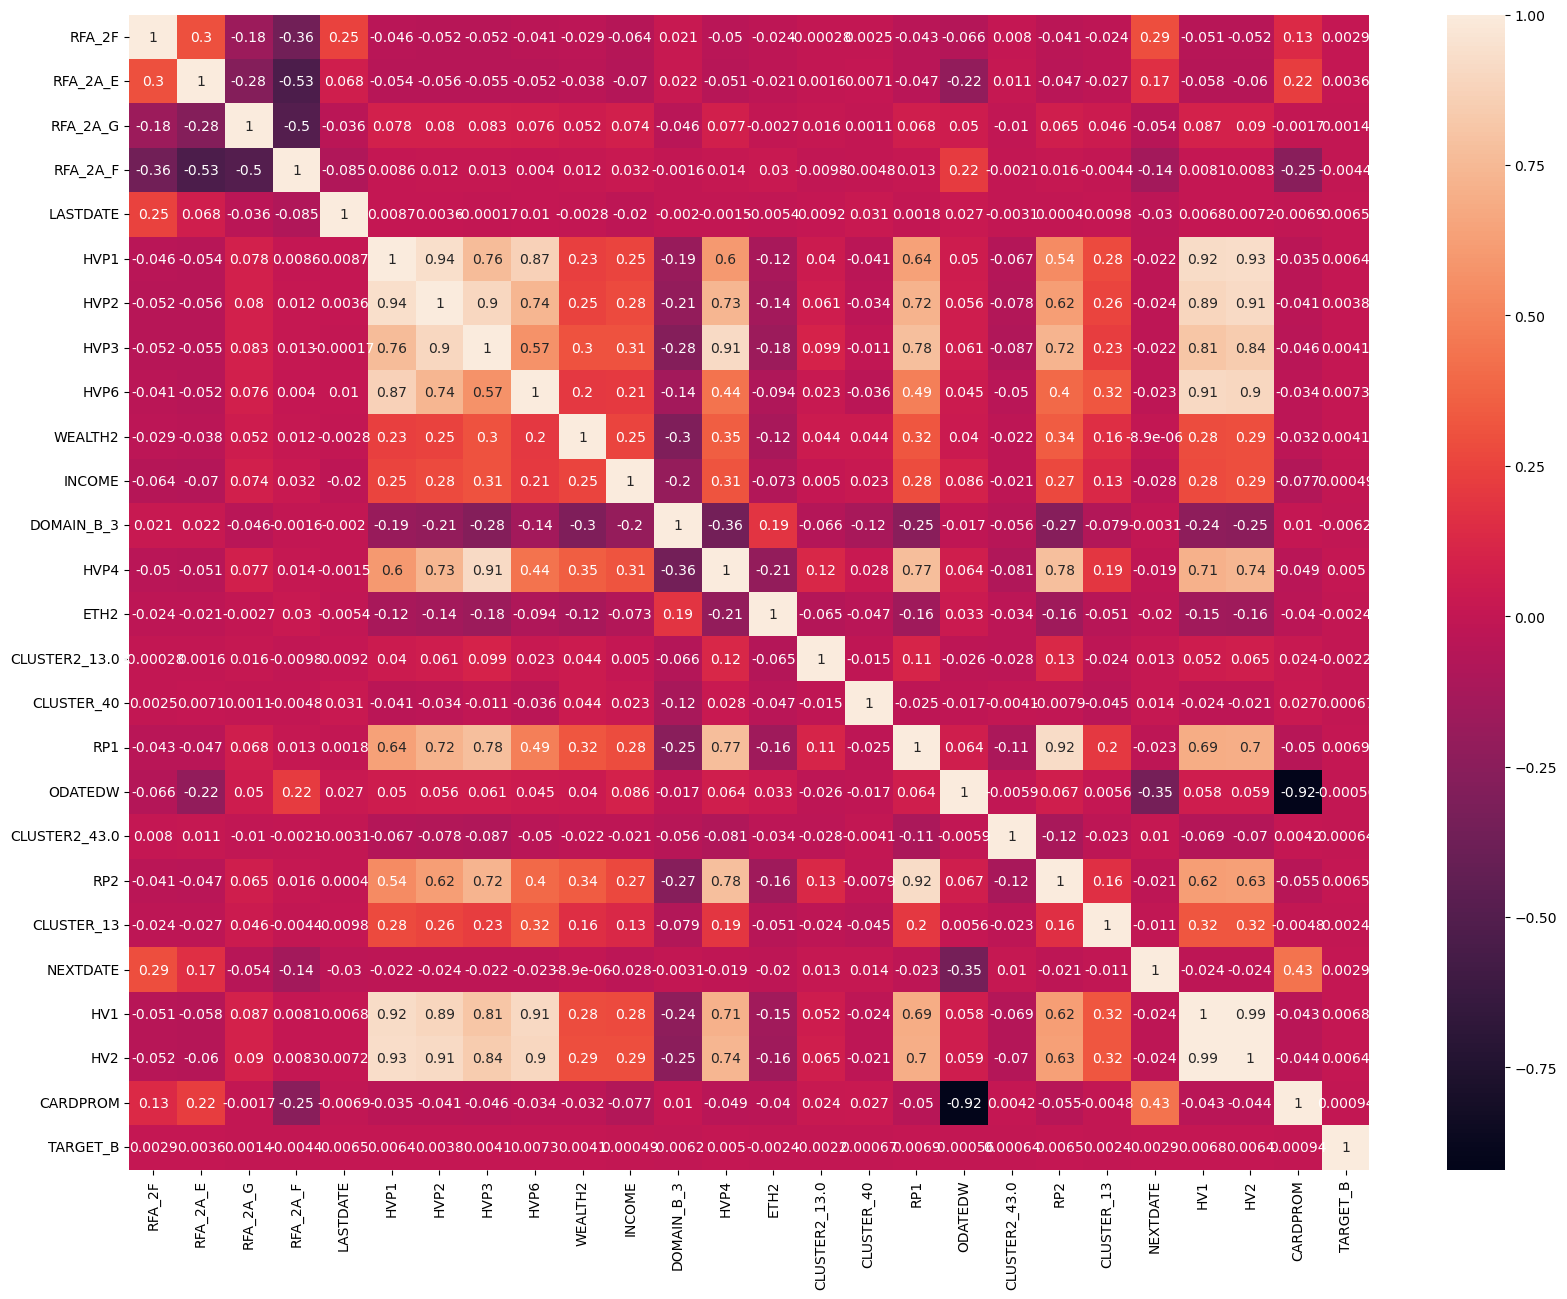

In [251]:
corr = data_train.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (20,15))
ax = sns.heatmap(corr, annot = True)
plt.show

In [258]:
drop_hvp = ['HVP1','HVP2','HVP3','HVP6']

In [259]:
X_train= X_train_all.drop(drop_hvp, axis=1)

In [260]:
X_test= X_test_all.drop(drop_hvp, axis=1)

In [261]:
X_train.shape

(71559, 21)

In [265]:
from sklearn.ensemble import RandomForestClassifier
clf_all = RandomForestClassifier(max_depth = 5,
                                 min_samples_split = 20,
                                 min_samples_leaf = 20)

clf.fit(X_train,y_train)
print('Train_Set = ', clf.score(X_train, y_train))
print('Test_Set = ', clf.score(X_test, y_test))

/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_16457/4004476208.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Train_Set =  0.9489372405986668
Test_Set =  0.9501530205844129


In [277]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 12.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


In [280]:
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [281]:
predictions = clf.predict(X_test)

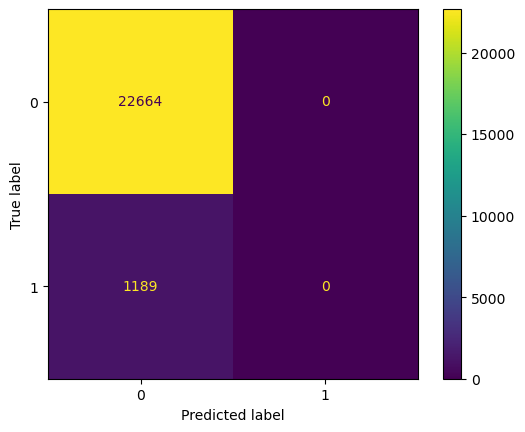

In [282]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [284]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [289]:
clf_sm = RandomForestClassifier(max_depth=5,
                             min_samples_split=20, 
                             min_samples_leaf =20,
                             max_samples=0.8, 
                             random_state=42)
clf_sm.fit(X_train_sm, y_train_sm)
print(clf.score(X_train_sm, y_train_sm))
print(clf.score(X_test, y_test))


/var/folders/v3/dt262g6s2893mxzspk7wv1f40000gn/T/ipykernel_16457/695614717.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_sm.fit(X_train_sm, y_train_sm)


0.7786171857742434
0.7474112270993166


In [292]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

pred_RF_sm = clf_sm.predict(X_test)
print('accuracy_score:',accuracy_score(y_test, pred_RF_sm))
print('precision_score:',precision_score(y_test, pred_RF_sm))
print('recall_score:',recall_score(y_test, pred_RF_sm))
print('f1_score:',f1_score(y_test, pred_RF_sm))

accuracy_score: 0.7474112270993166
precision_score: 0.06682192762450735
recall_score: 0.3137089991589571
f1_score: 0.11017574952001183


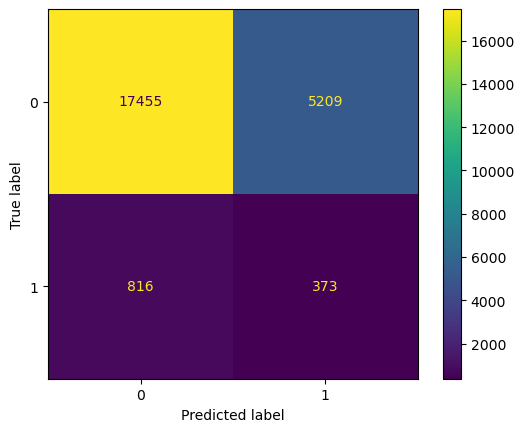

In [294]:
cm2 = confusion_matrix(y_test, pred_RF_sm, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=clf.classes_)
disp.plot()

In [303]:
X_all = pd.concat([X_train,X_test], ignore_index=True)


In [304]:
X_all

,RFA_2F,RFA_2A_E,RFA_2A_G,RFA_2A_F,LASTDATE,WEALTH2,INCOME,DOMAIN_B_3,HVP4,ETH2,CLUSTER2_13.0,CLUSTER_40,RP1,ODATEDW,CLUSTER2_43.0,RP2,CLUSTER_13,NEXTDATE,HV1,HV2,CARDPROM
0,1.000000,1.0,0.0,0.0,0.497487,5.0,5.0,0.0,1.000000,0.010101,0.0,0.0,1.000000,0.856631,0.0,1.000000,0.0,0.979697,0.388333,0.396500,0.150000
1,0.000000,0.0,0.0,1.0,0.492462,5.0,6.0,1.0,0.121212,0.373737,0.0,0.0,0.000000,0.928315,0.0,0.020202,0.0,0.000000,0.077667,0.083167,0.066667
2,0.000000,0.0,0.0,1.0,0.015075,9.0,1.0,0.0,1.000000,0.010101,0.0,1.0,0.494949,0.283154,0.0,0.777778,0.0,0.907142,0.349833,0.419833,0.516667
3,0.333333,0.0,1.0,0.0,0.542714,5.0,4.0,0.0,1.000000,0.545455,0.0,0.0,0.404040,0.784946,0.0,0.505051,0.0,0.970112,0.313000,0.320167,0.233333
4,1.000000,0.0,0.0,0.0,0.497487,3.0,1.0,0.0,0.929293,0.000000,0.0,0.0,0.121212,0.569892,0.0,0.545455,0.0,0.939091,0.177167,0.179833,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0.333333,1.0,0.0,0.0,0.045226,3.0,5.0,0.0,0.282828,0.010101,0.0,0.0,0.141414,0.181818,0.0,0.323232,0.0,0.897661,0.102667,0.112333,0.535714
95408,0.000000,0.0,1.0,0.0,0.015075,5.0,5.0,0.0,0.202020,0.010101,0.0,0.0,0.020202,0.181818,0.0,0.050505,0.0,0.918479,0.086833,0.095667,0.446429
95409,0.000000,0.0,0.0,1.0,0.005025,5.0,1.0,0.0,0.111111,0.000000,0.0,0.0,0.020202,0.090909,0.0,0.030303,0.0,0.887664,0.064500,0.072833,0.464286
95410,0.000000,0.0,0.0,1.0,0.492462,2.0,6.0,0.0,0.313131,0.000000,0.0,0.0,0.080808,0.090909,1.0,0.171717,0.0,0.907348,0.109000,0.114333,0.553571


In [306]:
y

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [309]:
Pred_RF = clf_sm.predict(X_all)

In [311]:
print('accuracy_score:',accuracy_score(y, Pred_RF))
print('precision_score:',precision_score(y, Pred_RF))
print('recall_score:',recall_score(y, Pred_RF))
print('f1_score:',f1_score(y, Pred_RF))

accuracy_score: 0.7576195866348049
precision_score: 0.051513516165431976
recall_score: 0.21680776378277927
f1_score: 0.0832474431142472


In [312]:
ALL = pd.concat([X_all, y], axis=1)

In [318]:
TARGETD = Y[Y['TARGET_B']==1]

In [333]:
mean_donation = TARGETD['TARGET_D'].mean()

In [322]:
TARGETD

,TARGET_B,TARGET_D
20,1,4.0
30,1,7.0
45,1,5.0
78,1,13.0
93,1,10.0
...,...,...
95298,1,20.0
95309,1,15.0
95398,1,3.0
95403,1,10.0


In [328]:
predict_y = clf_sm.predict(X)

In [329]:
array = confusion_matrix(y,predict_y)

In [331]:
Q1 = array[0][0]
Q2 = array[0][1]
Q3 = array[1][0]
Q4 = array[1][1]

In [332]:
print(Q1)
print(Q2)
print(Q3)
print(Q4)

71236
19333
3793
1050


In [335]:
donation_gained = Q4 * mean_donation
unexpected_donation = Q3 * mean_donation

In [337]:
print('gained donation:',donation_gained)
print('unexpected donation:',unexpected_donation)

gained donation: 16405.56163534999
unexpected donation: 59263.13836465


In [338]:
print('total donation:',donation_gained + unexpected_donation)

total donation: 75668.7
